In [10]:
import os
import math
import scipy
from dataclasses import asdict, dataclass
from pathlib import Path

%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt
import time
import yaml
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Normal

import sys
sys.path.append('../scripts')
from utils import *

In [5]:
episode_idx = 5
data_path = "/home/yixuany/workspace/CORL/data/"
episode_dict = np.load(data_path + f'episode_{episode_idx}.npy',allow_pickle='TRUE').item()
state_cur = episode_dict['start_state']
radar_locs = episode_dict['radar_locations']
radar_orientations = episode_dict['radar_orientations']
goal_location = episode_dict['goal_location']

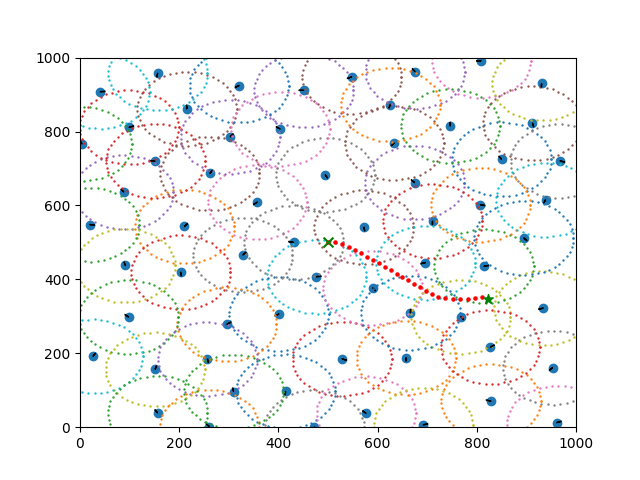

In [9]:
fig, ax = plt.subplots()
visualiza_radar_config(radar_locs, radar_orientations, radius=100.0, xlim=[0, 1000.0], ylim=[0, 1000.0])
ax.scatter(episode_dict['state_history'][:, 0], episode_dict['state_history'][:, 1], s=5, c='r')
ax.scatter(episode_dict['start_state'][0], episode_dict['start_state'][1], s=50, c='g', marker='x')
ax.scatter(episode_dict['goal_location'][0], episode_dict['goal_location'][1], s=50, c='g', marker='*')

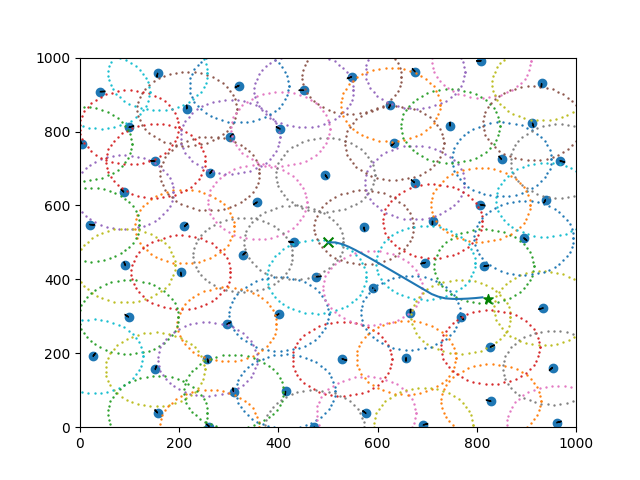

In [15]:
plt.close()
fig, ax = plt.subplots()
visualiza_radar_config(radar_locs, radar_orientations, radius=100.0, xlim=[0, 1000.0], ylim=[0, 1000.0])
# ax.scatter(episode_dict['state_history'][:, 0], episode_dict['state_history'][:, 1], s=5, c='r')
ax.scatter(episode_dict['start_state'][0], episode_dict['start_state'][1], s=50, c='g', marker='x')
ax.scatter(episode_dict['goal_location'][0], episode_dict['goal_location'][1], s=50, c='g', marker='*')
cs = scipy.interpolate.CubicSpline(episode_dict['state_history'][:, 0], episode_dict['state_history'][:, 1])
ax.plot(episode_dict['state_history'][:, 0], cs(episode_dict['state_history'][:, 0]), label="S")

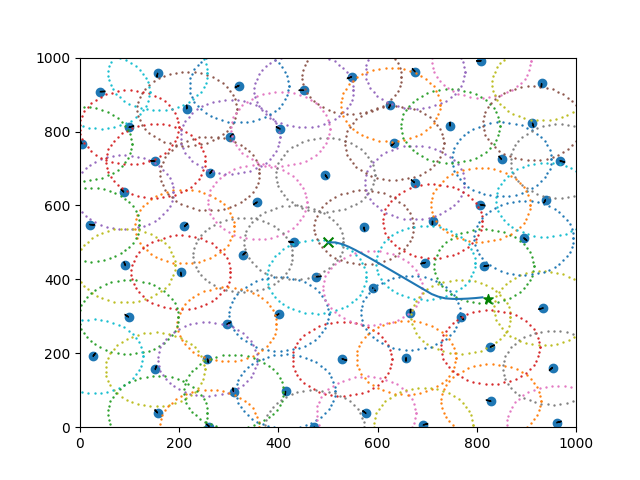

In [20]:
plt.close()
fig, ax = plt.subplots()
visualiza_radar_config(radar_locs, radar_orientations, radius=100.0, xlim=[0, 1000.0], ylim=[0, 1000.0])
# ax.scatter(episode_dict['state_history'][:, 0], episode_dict['state_history'][:, 1], s=5, c='r')
ax.scatter(episode_dict['start_state'][0], episode_dict['start_state'][1], s=50, c='g', marker='x')
ax.scatter(episode_dict['goal_location'][0], episode_dict['goal_location'][1], s=50, c='g', marker='*')
t, c, k = scipy.interpolate.splrep(episode_dict['state_history'][:, 0], episode_dict['state_history'][:, 1])
bspline = scipy.interpolate.BSpline(t, c, k, extrapolate=False)
ax.plot(episode_dict['state_history'][:, 0], bspline(episode_dict['state_history'][:, 0]), label="S")

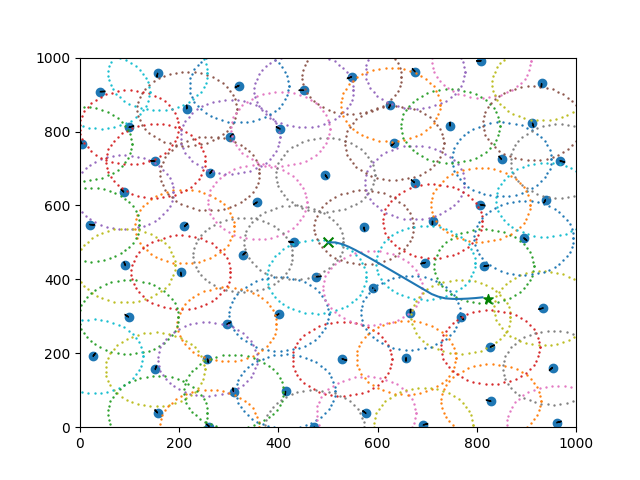

In [40]:
plt.close()
fig, ax = plt.subplots()
visualiza_radar_config(radar_locs, radar_orientations, radius=100.0, xlim=[0, 1000.0], ylim=[0, 1000.0])
# ax.scatter(episode_dict['state_history'][:, 0], episode_dict['state_history'][:, 1], s=5, c='r')
ax.scatter(episode_dict['start_state'][0], episode_dict['start_state'][1], s=50, c='g', marker='x')
ax.scatter(episode_dict['goal_location'][0], episode_dict['goal_location'][1], s=50, c='g', marker='*')
t, c, k = scipy.interpolate.splrep(episode_dict['state_history'][:, 0], episode_dict['state_history'][:, 1])
bspline = scipy.interpolate.BSpline(t, c, k, extrapolate=False)
ax.plot(episode_dict['state_history'][:, 0], bspline(episode_dict['state_history'][:, 0]), label="S")

In [41]:
c

array([500.        , 502.1619524 , 498.55441235, 488.25880636,
       479.78796579, 470.90383378, 461.83229902, 452.67200091,
       443.46757602, 434.24046787, 425.00141526, 415.75526991,
       406.50685306, 397.25012314, 388.01396871, 378.69397391,
       369.68152386, 359.09074148, 352.86341178, 347.79052449,
       347.07864594, 346.91740048, 348.06317839, 349.75369259,
       351.26995417,   0.        ,   0.        ,   0.        ,
         0.        ])